**1. Setting up the Environment**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**2. Loading the Dataset**

In [4]:
# Load the dataset
data = pd.read_csv('/content/country_wise_latest.csv')

In [5]:
# Display the first few rows of the dataset
print(data.head())

  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

**3. Exploratory Data Analysis (EDA)**

In [6]:
#a) Basic Information and Summary
# Check the structure of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [7]:
# Get summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

          Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173    4197.719635      

In [8]:
#b) Check for Duplicate Entries
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")

Number of duplicate entries: 0


**4. Data Cleaning**

In [9]:
# Drop duplicates if any
data = data.drop_duplicates()

# Handle missing values (e.g., fill or drop)
data = data.dropna()  # Or fillna with appropriate values

**5. Data Visualization and Analysis**

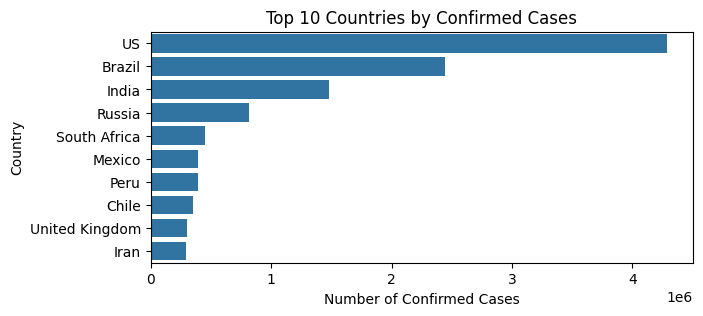

In [10]:
#a) Top 10 Countries with the Most Cases

# Top 10 countries by confirmed cases
top_10_cases = data.nlargest(10, 'Confirmed')

# Plot
plt.figure(figsize=(7,3))
sns.barplot(x='Confirmed', y='Country/Region', data=top_10_cases)
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Country')
plt.show()

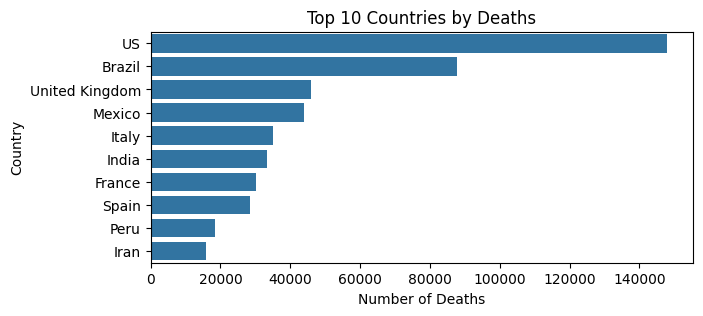

In [11]:
#b) Top 10 countries by deaths
top_10_deaths = data.nlargest(10, 'Deaths')

# Plot
plt.figure(figsize=(7, 3))
sns.barplot(x='Deaths', y='Country/Region', data=top_10_deaths)
plt.title('Top 10 Countries by Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Country')
plt.show()

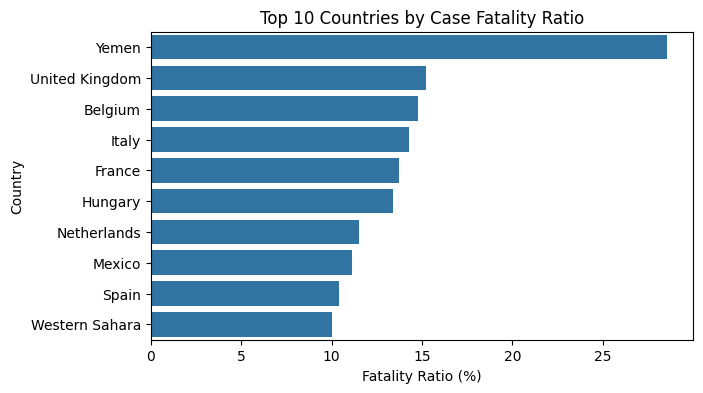

In [13]:
#c) Case Fatality Ratio (Deaths/Confirmed Cases)

# Calculate case fatality ratio
data['Fatality_Ratio'] = data['Deaths'] / data['Confirmed'] * 100

# Top 10 countries by fatality ratio
top_10_fatality = data.nlargest(10, 'Fatality_Ratio')

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(x='Fatality_Ratio', y='Country/Region', data=top_10_fatality)
plt.title('Top 10 Countries by Case Fatality Ratio')
plt.xlabel('Fatality Ratio (%)')
plt.ylabel('Country')
plt.show()


**6. Analysis by Continents**

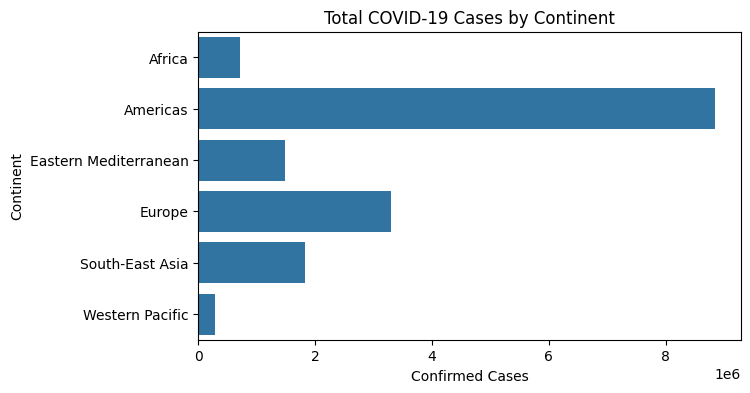

In [17]:
#a) Total Cases by Region

# Group by Region
continent_cases = data.groupby('WHO Region')['Confirmed'].sum().reset_index()

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(x='Confirmed', y='WHO Region', data=continent_cases)
plt.title('Total COVID-19 Cases by Continent')
plt.xlabel('Confirmed Cases')
plt.ylabel('Continent')
plt.show()


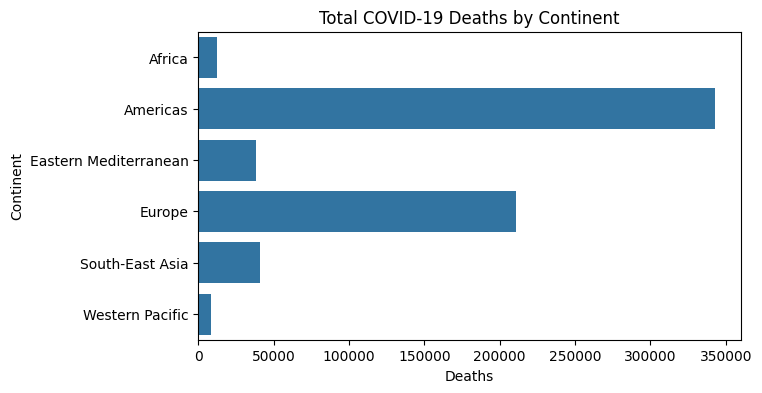

In [21]:
#b) Total Deaths by Region

# Group by Region for deaths
continent_deaths = data.groupby('WHO Region')['Deaths'].sum().reset_index()

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(x='Deaths', y='WHO Region', data=continent_deaths)
plt.title('Total COVID-19 Deaths by Continent')
plt.xlabel('Deaths')
plt.ylabel('Continent')
plt.show()

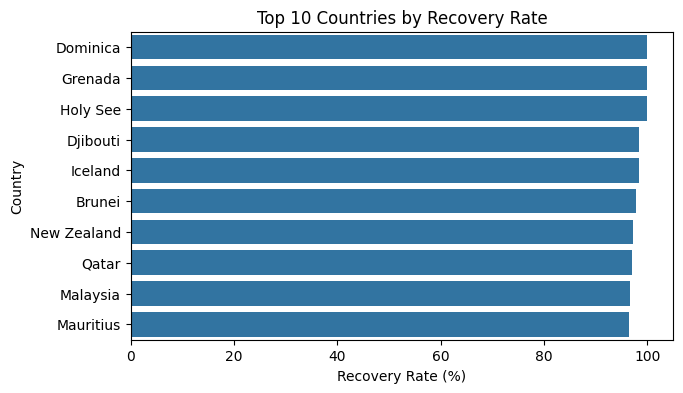

In [23]:
#Recovery Rates Across Countries

# Calculate recovery rate
data['Recovery Rate'] = (data['Recovered'] / data['Confirmed']) * 100

# Top 10 countries by recovery rate
top_10_recovery = data.nlargest(10, 'Recovery Rate')

# Plot
plt.figure(figsize=(7,4))
sns.barplot(x='Recovery Rate', y='Country/Region', data=top_10_recovery)
plt.title('Top 10 Countries by Recovery Rate')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Country')
plt.show()


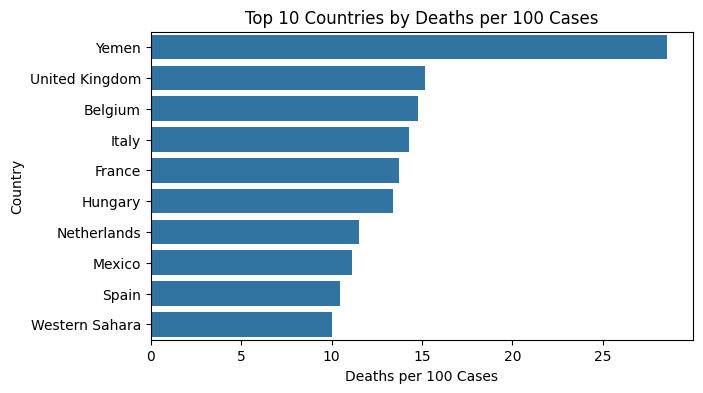

In [24]:
#Deaths per 100 Cases

# Top 10 countries by Deaths per 100 Cases
top_10_death_rate = data.nlargest(10, 'Deaths / 100 Cases')

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(x='Deaths / 100 Cases', y='Country/Region', data=top_10_death_rate)
plt.title('Top 10 Countries by Deaths per 100 Cases')
plt.xlabel('Deaths per 100 Cases')
plt.ylabel('Country')
plt.show()
